In [1]:
import pandas as pd
churn_df = pd.read_csv('./desktop/telecom_churn_clean.csv')
churn_df.columns

Index(['Unnamed: 0', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')

### k-Nearest Neighbors: Fit & Predict
In this exercise, you will build your first classification model using the churn_df dataset, which has been preloaded for the remainder of the chapter.

The features to use will be "account_length" and "customer_service_calls". The target, "churn", needs to be a single column with the same number of observations as the feature data.

You will convert the features and the target variable into NumPy arrays, create an instance of a KNN classifier, and then fit it to the data.

Now you have fit a KNN classifier, you can use it to predict the label of new data points. All available data was used for training, however, fortunately, there are new observations available. These have been preloaded for you as X_new.

The model knn, which you created and fit the data in the last exercise, has been preloaded for you. You will use your classifier to predict the labels of a set of new data points:

X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

In [2]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Prepare array for X, y
X = churn_df[['account_length','customer_service_calls']]
y = churn_df['churn']

# Create knn classifier with 6 neighbors
knn= KNeighborsClassifier(n_neighbors = 6)

# Fit x, y on knn classifier
knn.fit(X,y)

# Get X_new as array
X_new = np.array([[30.0, 17.5],[107.0, 24.1],[213.0, 10.9]])

# Predict 
y_pred = knn.predict(X_new)

print('Prediction {}'.format(y_pred))

Prediction [0 1 0]


### Train/test split + computing accuracy
Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the churn_df dataset!

NumPy arrays have been created for you containing the features as X and the target variable as y. You will split them into training and test sets, fit a KNN classifier to the training data, and then compute its accuracy on the test data using the .score() method.

In [3]:
from sklearn.model_selection import train_test_split

# Create two arrays
X = churn_df.drop('churn', axis= 1).values
y = churn_df['churn'].values

# Split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify= y)

# Fit the classifier to the training data
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train, y_train)

# print the accuracy
print(knn.score(X_test, y_test))


0.8545727136431784


### Overfitting and underfitting
Interpreting model complexity is a great way to evaluate performance when utilizing supervised learning. Your aim is to produce a model that can interpret the relationship between features and the target variable, as well as generalize well when exposed to new observations.

You will generate accuracy scores for the training and test sets using a KNN classifier with different n_neighbor values, which you will plot in the next exercise.

The training and test sets have been created from the churn_df dataset and preloaded as X_train, X_test, y_train, and y_test.

In [4]:
# Create diff type of neighbor values
neighbors = np.arange(1,13)
train_accuracies = {}
test_accuracies = {}

# Create for loop to set up classifier,fit model, compute accuracy
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

print(neighbors, '\n', train_accuracies, '\n', test_accuracies)


[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697, 12: 0.8574643660915229} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287, 12: 0.8605697151424287}


In [14]:
train_accuracies.values()

dict_values([1.0, 0.8885971492873218, 0.8994748687171793, 0.8750937734433608, 0.878469617404351, 0.8660915228807202, 0.8705926481620405, 0.8615903975993998, 0.86384096024006, 0.858589647411853, 0.8604651162790697, 0.8574643660915229])

In [15]:
neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])


### Visualizing model complexity
Now you have calculated the accuracy of the KNN model on the training and test sets using various values of n_neighbors, you can create a model complexity curve to visualize how performance changes as the model becomes less complex!

The variables neighbors, train_accuracies, and test_accuracies, which you generated in the previous exercise, have all been preloaded for you. You will plot the results to aid in finding the optimal number of neighbors for your model.

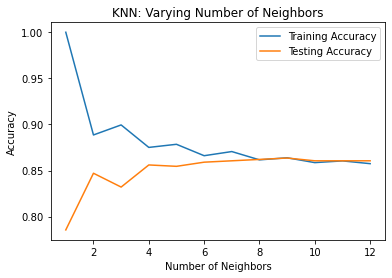

In [16]:
import matplotlib.pyplot as plt
plt.title('KNN: Varying Number of Neighbors')
plt.plot(neighbors, list(train_accuracies.values()), label='Training Accuracy')
plt.plot(neighbors, list(test_accuracies.values()), label='Testing Accuracy')

plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

plt.show()